In [3]:
import cv2
import numpy as np
from PIL import Image

## 拟合多边形
- cv2.approxPolyDP() 拟合为适合轮廓形状的多边形
- 输入：
    - InputArray curve：输入曲线，数据类型可以为vector<Point>。
    - OutputArray approxCurve：输出折线，数据类型可以为vector<Point>。
    - double epsilon：判断点到相对应的line segment 的距离的阈值。（距离大于此阈值则舍弃，小于此阈值则保留，epsilon越小，折线的形状越“接近”曲线。）
    - bool closed：曲线是否闭合的标志位。
- 返回值：
    - 多边形角点坐标


In [7]:
imgpath = 'sampleimage/1.png'
image = cv2.imread(imgpath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cont in contours:
    perimeter = cv2.arcLength(cont,True)
    epsilon = 0.01*cv2.arcLength(cont,True)
    box = cv2.approxPolyDP(cont,epsilon,True)
    img = cv2.polylines(image,[box],True,(0,0,255),10)

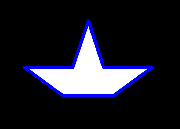

In [9]:
Image.fromarray(cv2.resize(img,(0,0), fx=0.3, fy=0.3))

## 最小外接矩形cv2.minAreaRect()
- 返回值：中心点坐标：(cx,cy)；长宽：(l,w)；从x轴逆时针旋转到宽的角度：theta
- cv2.boxPoints()可以将minAreaRect转换为四个角点坐标

In [10]:
imgpath = 'sampleimage/1.png'
image = cv2.imread(imgpath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cont in contours:
    rect = cv2.minAreaRect(cont)
    box = cv2.boxPoints(rect)
    # make clock-wise
    startidx = box.sum(axis=1).argmin()
    box = np.roll(box,4-startidx,0)
    
    box = box.reshape((-1,1,2)).astype(np.int32)
    cv2.polylines(image,[box],True,(0,255,0),10)

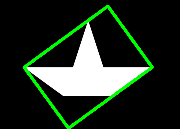

In [11]:
Image.fromarray(cv2.resize(image,(0,0), fx=0.3, fy=0.3))

## bounding box

In [12]:
imgpath = 'sampleimage/1.png'
image = cv2.imread(imgpath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# image3 = np.zeros_like(image)
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cont in contours:
    x, y, w, h = cv2.boundingRect(cont)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 10)

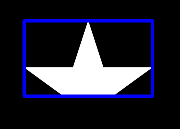

In [14]:
Image.fromarray(cv2.resize(image,(0,0), fx=0.3, fy=0.3))

## 外接圆
- cv2.minEnclosingCircle()

In [15]:
imgpath = 'sampleimage/1.png'
image = cv2.imread(imgpath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# image3 = np.zeros_like(image)
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cont in contours:
    (x, y), radius = cv2.minEnclosingCircle(cont)
    cv2.circle(image,(int(x),int(y)),int(radius), (0, 0, 255), 10)

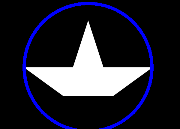

In [16]:
Image.fromarray(cv2.resize(image,(0,0), fx=0.3, fy=0.3))

##  外接椭圆
- cv2.minEllipse()

In [17]:
imgpath = 'sampleimage/1.png'
image = cv2.imread(imgpath)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cont in contours:
#     (x,y), (a,b), theta = cv2.fitEllipse(cont)
#     cv2.ellipse(image,(int(x),int(y)),(int(a/2),int(b/2)),theta,-180,180,(255,100,0),10)
    out = cv2.fitEllipse(cont)
    cv2.ellipse(image,out,(255,100,0),10)

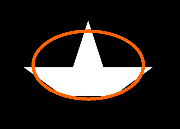

In [18]:
Image.fromarray(cv2.resize(image,(0,0), fx=0.3, fy=0.3))